# Data generation: SIR model

On this notebook we will generate data from the SIR model (add reference) using summer library (https://summer.readthedocs.io/)

## Data Generation

In [12]:
# Simulation libraries
import numpy as np
from summer import CompartmentalModel

# Numpy random seed
np.random.seed(42)

# Number of simulations
n_sim = 100000

# Beta: contact rate
beta_sim =  np.random.uniform(0.1, 3, n_sim) # Search for info to argument this
# Gamma: mean recovery rate
gamma_sim = np.random.uniform(0.1, 1, n_sim) # Serarch for info to argument this

# Function for creating model and running each simulation
def create_run_model(beta, gamma):
    # Create a model.
    model = CompartmentalModel(
        times=[0, 100], # Units of time: days
        compartments=["S", "I", "R"],
        infectious_compartments=["I"],
        timestep=0.1,
    )

    # Add people to the model.
    model.set_initial_population(distribution={"S": 90, "I": 10})

    # Add intercompartmental flows.
    model.add_infection_frequency_flow(name="infection", contact_rate=beta, source="S", dest="I")
    model.add_transition_flow(name="recovery", fractional_rate=gamma, source="I", dest="R")

    # Run the model
    model.run()
    
    # Outputs
    return model.outputs, model.times, np.array([beta, gamma])



## Data simulation

Data is saved on `data_sim` variable. `data_sim` includes
- data_sim[0] = model.outputs; Outputs simulation from each compartment
- data_sim[1] = model.times; time used on simulation
- data_sim[2] = [beta, gamma]; Contact rate (beta) and Recovery rate (gamma) used on sim.

In [13]:
from tqdm import trange
data_sim = []
for i in trange(n_sim):
    data_sim.append(create_run_model(beta=beta_sim[i], gamma=gamma_sim[i]))


  0%|          | 57/100000 [00:01<53:17, 31.26it/s]


KeyboardInterrupt: 

## Save Data

Data is saved from `data_sim` variable as a numpy file.

In [7]:
import pickle

# Save Path
data_path = '../../data/raw/simulated/SIR'

# Saving data
with open(f'{data_path}/sir.pkl', 'wb') as f:
    pickle.dump(data_sim, f)

## Load data (test)

In [14]:
# Load Path
data_path = '../../data/raw/simulated/SIR'
with open(f'{data_path}/sir.pkl', 'rb') as f:
    data_sim_test = pickle.load(f) 

## Plot examples

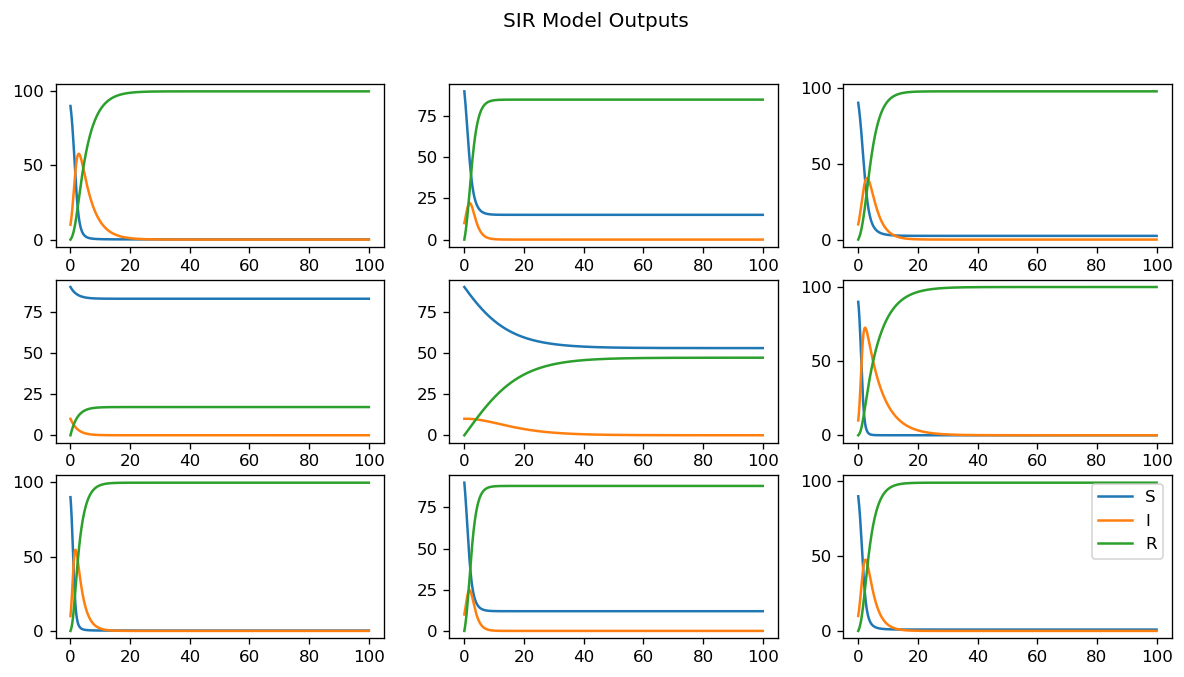

In [ ]:
import matplotlib.pyplot as plt

n_sim = len(data_sim_test)
n_plot = np.random.randint(n_sim, size=9)
# Plot the model results.
fig = plt.figure(dpi=120, figsize=(12,6))

for n, n_sim in enumerate(n_plot):
    ax = fig.add_subplot(3,3, n + 1)
    for i in range(data_sim_test[n_sim][0].shape[1]):
        ax.plot(data_sim_test[n_sim][1], data_sim_test[n_sim][0].T[i])    


fig.suptitle(f"SIR Model Outputs")
plt.legend(["S", "I", "R"])
plt.show()